In [64]:
import csv 
import intervaltree
from intervaltree import Interval, IntervalTree 
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt

In [65]:
def find_smallest_region(genome):
    smallest=1000000000000000000
    for i in genome:
        for j in [-1,0,1]:
            x=np.abs(list(genome[i])[j].end-list(genome[i])[j+1].begin)
            if x<smallest:
                smallest=x
                print(i)
    return smallest

In [66]:
file_name="/project/ReadStatistics/ML/telocentro_hg38.bed"
file=open(file_name,"r")
data=file.readlines()

In [67]:
genome={}
for i in data:
    x=i.split("\t")
    if x[0] not in genome.keys():
        genome[x[0]]=IntervalTree()
        genome[x[0]][int(x[1]):int(x[2])]=(int(x[1]),int(x[2]))
    else:
        genome[x[0]][int(x[1]):int(x[2])]=(int(x[1]),int(x[2]))

In [68]:
for key in genome.keys():
    genome[key].merge_overlaps(strict=False)

In [69]:
del genome["chrX"]

In [70]:
del genome["chrY"]

In [71]:
list(genome["chr1"])[2]

Interval(0, 10000, (0, 10000))

In [72]:
find_smallest_region(genome)

chr1
chr2
chr3
chr4
chr5
chr8
chr10
chr12
chr13
chr14
chr18
chr21


10890000

In [73]:
genome

{'chr1': IntervalTree([Interval(0, 10000, (0, 10000)), Interval(121700000, 125100000), Interval(248946422, 248956422, (248946422, 248956422))]),
 'chr2': IntervalTree([Interval(0, 10000, (0, 10000)), Interval(91800000, 96000000), Interval(242183529, 242193529, (242183529, 242193529))]),
 'chr3': IntervalTree([Interval(0, 10000, (0, 10000)), Interval(87800000, 94000000), Interval(198285559, 198295559, (198285559, 198295559))]),
 'chr4': IntervalTree([Interval(0, 10000, (0, 10000)), Interval(48200000, 51800000), Interval(190204555, 190214555, (190204555, 190214555))]),
 'chr5': IntervalTree([Interval(0, 10000, (0, 10000)), Interval(46100000, 51400000), Interval(181528259, 181538259, (181528259, 181538259))]),
 'chr6': IntervalTree([Interval(0, 10000, (0, 10000)), Interval(58500000, 62600000), Interval(170795979, 170805979, (170795979, 170805979))]),
 'chr7': IntervalTree([Interval(0, 10000, (0, 10000)), Interval(58100000, 62100000), Interval(159335973, 159345973, (159335973, 159345973))]

In [74]:
# MAKING SPLITS OF THE GENOME
def get_splits(chromosome_name):
    splits=IntervalTree()

    x=sorted(genome[chromosome_name])
    print(len(x))
    split_length=(10**7)
    for i in range(len(x)-1):
        s=x[i].end
        e=x[i+1].begin
        for i in range(s+1,(s+e)//2,split_length+1):
            splits[i:i+split_length]=(i,i+split_length)
        for i in range( e-1 , (s+e)//2 + (e-s)%(split_length+1) , -split_length-1): #  -split_length-1 
            splits[i-split_length:i]=(i-split_length,i)
    return splits

In [75]:
splits=get_splits("chr21")

3


In [76]:
len(splits)

6

In [77]:
len(splits)

6

In [78]:
duplicated_regions=pd.read_csv("/project/ReadStatistics/ML/Full_Data/out_df_ws_jumps.csv")

In [102]:
duplicated_regions

,chr,coor_s,coor_e,ids,jumps,length,centro,telo,gaps,genes,...,MIR_s_r,Alu_s_r,Satellite_s_r,used_coor_l_s,used_coor_l_e,used_coor_r_s,used_coor_r_e,CG_frac_l,CG_frac_r,CG_frac_in
0,1,10000,207666,id1,3,197666,121818793,0,2,6,...,0,0,0,9950,10000,207666,207716,-1.000,0.000,0.444
1,1,257666,297956,id2,3,40290,121728503,247666,2,0,...,0,1,0,257616,257666,297956,298006,-1.000,0.538,0.391
2,1,347968,535988,id3,1,188020,121490471,337968,2,1,...,0,0,0,347918,347968,535988,536038,-1.000,1.000,0.430
3,1,585988,817292,id4,4,231304,121209167,575988,1,2,...,0,0,0,585938,585988,817292,817342,-1.000,0.412,0.428
4,1,817367,821400,id5,1,4033,121205059,807367,0,1,...,0,0,0,817317,817367,821400,821450,0.392,0.529,0.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6651,22,48911634,48912886,id4359,1,1252,33857316,1895582,0,0,...,0,0,0,48911584,48911634,48912886,48912936,0.490,0.451,0.468
6652,22,49383944,49385910,id4360,1,1966,34329626,1422558,0,0,...,0,0,0,49383894,49383944,49385910,49385960,0.510,0.392,0.393
6653,22,49386637,49388496,id4361,1,1859,34332319,1419972,0,0,...,0,0,0,49386587,49386637,49388496,49388546,0.392,0.314,0.397
6654,22,50432257,50442552,id4362,2,10295,35377939,365916,0,1,...,0,1,0,50432207,50432257,50442552,50442602,0.725,0.451,0.648


In [79]:
file=open("/project/ReadStatistics/ML/chr1.csv","w")

In [80]:
file.write("START"+","+"END"+"\n")
for i in sorted(splits):
    file.write(str(i[0])+","+str(i[1])+"\n")

In [81]:
def get_duplicated_regions():
    add_columns=['component_size', 'intra_degree', 'iner_degree', 'self_loops', 'edges_double', 'edges_tandem','edges_ident_mean']
    old_data=pd.read_csv("/project/ReadStatistics/ML/df_Dinesh_data.csv")
    duplicated_regions=pd.read_csv("/project/ReadStatistics/ML/Full_Data/out_df_ws_jumps.csv")
    
    
    
    duplicated_regions["CG_frac_l"][duplicated_regions["CG_frac_l"]==-1.000]=0.0
    duplicated_regions["CG_frac_l"][duplicated_regions["CG_frac_l"]==0.0]=duplicated_regions["CG_frac_r"][duplicated_regions["CG_frac_l"]==0.0]   #np.mean(duplicated_regions["CG_frac_l"])
    
    duplicated_regions["CG_frac_r"][duplicated_regions["CG_frac_r"]==-1.000]=0.0
    duplicated_regions["CG_frac_r"][duplicated_regions["CG_frac_r"]==0.0]=duplicated_regions["CG_frac_l"][duplicated_regions["CG_frac_r"]==0.0] #np.mean(duplicated_regions["CG_frac_r"])
    
    duplicated_regions["CG_frac_in"][duplicated_regions["CG_frac_in"]==-1.000]=0.0
    duplicated_regions["CG_frac_in"][duplicated_regions["CG_frac_in"]==0.0]=np.mean(duplicated_regions["CG_frac_in"])
    duplicated_regions["CG_frac"]=(duplicated_regions["CG_frac_l"]+duplicated_regions["CG_frac_r"])/2
    
    duplicated_regions["CG_frac"][duplicated_regions["CG_frac"]==0.0]=np.mean(duplicated_regions["CG_frac_in"])
    
    duplicated_regions.drop(["CG_frac_l","CG_frac_r"],axis=1,inplace=True)
    
    for i in add_columns:
        duplicated_regions[i]=old_data[i]
    left_right_columns=["DNA","LINE","LTR","SINE","Low_complexity","Retroposon","Satellite","Simple_repeat","rRNA","snRNA","scRNA","srpRNA","tRNA","RC", 'L1_s', 'L2_s', 'MIR_s', 'Alu_s', 'Satellite_s']
    
    for i in left_right_columns:
        duplicated_regions[i]=duplicated_regions[i+"_r"]+duplicated_regions[i+"_l"]
        duplicated_regions.drop([i+"_r",i+"_l"],axis=1,inplace=True)
        
    return duplicated_regions

In [82]:
def find_duplicated_regions(splits,duplicated_regions,chromosome_name):
    
    splits2=copy.deepcopy(splits)
    df=duplicated_regions[duplicated_regions["chr"]==chromosome_name]
    for i,row in df.iterrows():
        splits2[row["coor_s"]:row["coor_e"]]=row["ids"]
        
    interval_with_dupliated_regions={}
    for i in splits:
        overlaps=splits2.overlap(i.begin,i.end)
        overlaps.remove(Interval(i.begin,i.end,(i.begin,i.end)))
        interval_with_dupliated_regions[(i.begin,i.end)]=overlaps
        
    return interval_with_dupliated_regions

In [83]:
def length_of_overlap(reg1,reg2):
    if reg1[0]<=reg2[0]:
        return(reg1[1]-reg2[0])
    else:
        return(reg2[1]-reg1[0])

In [84]:
def binning(x):
    if x>0.933:
        return 1
    else:
        return 0

In [85]:
def binning1(x): #(1.745, 0.196)
    if x>0.40174999999999994:
        return 1
    else:
        return 0

In [86]:
def binning2(x): #0.749, 0.065
    if x>0.424:
        return 1
    else:
        return 0

In [87]:
def binning_length(x):
    if x<2574.5:
        return 0 
    else:
        return 1

In [88]:
columns_needed=["chromosome_name","start", "end",'length_0','length_1', 'jumps',  'gaps', 'genes',
       'cpgisl_in', 'cpgisl_bor', 'repli_in', 'repli_bor', 'repli_bor_deriv',
       'repli_deriv', 'recomb_in', 'recomb_bor', 'dnase_in', 'dnase_bor','DNA', 'LINE',
       'LTR', 'SINE', 'Low_complexity', 'Retroposon', 'Satellite',
       'Simple_repeat', 'rRNA', 'snRNA', 'scRNA', 'srpRNA', 'tRNA', 'RC',
       'L1_s', 'L2_s', 'MIR_s', 'Alu_s', 'Satellite_s','component_size', 'intra_degree', 'iner_degree', 'self_loops',
       'edges_double', 'edges_tandem','edges_ident_mean_0','edges_ident_mean_1',"CG_frac_0","CG_frac_1","CG_frac_in_0","CG_frac_in_1"]

In [89]:
len(columns_needed)

49

In [90]:
columns_needed[45]

'CG_frac_0'

In [91]:
def create_training_data(duplicated_regions):
    
    columns_needed=["chromosome_name","start", "end",'length_0','length_1', 'jumps',  'gaps', 'genes',
       'cpgisl_in', 'cpgisl_bor', 'repli_in', 'repli_bor', 'repli_bor_deriv',
       'repli_deriv', 'recomb_in', 'recomb_bor', 'dnase_in', 'dnase_bor','DNA', 'LINE',
       'LTR', 'SINE', 'Low_complexity', 'Retroposon', 'Satellite',
       'Simple_repeat', 'rRNA', 'snRNA', 'scRNA', 'srpRNA', 'tRNA', 'RC',
       'L1_s', 'L2_s', 'MIR_s', 'Alu_s', 'Satellite_s','component_size', 'intra_degree', 'iner_degree', 'self_loops',
       'edges_double', 'edges_tandem','edges_ident_mean_0','edges_ident_mean_1',"CG_frac_0","CG_frac_1","CG_frac_in_0","CG_frac_in_1"]
    
    df=pd.DataFrame(columns=columns_needed)
    
    
    for i in range(1,23):
        print(i)
        chr_name="chr"+str(i)
        splits=get_splits(chr_name)
        overlap_data=find_duplicated_regions(splits,duplicated_regions,i)


        for split in overlap_data:
            start=split[0]
            end=split[1]
            cumm_features=np.zeros(len(columns_needed))
            # START AND END POSITION OF SPLIT
            cumm_features[0]=i
            cumm_features[1]=start
            cumm_features[2]=end

            for dups in overlap_data[split]:

                # EXTRACTING RELEVENT ROW FROM FEATURE DATA IE. DUPLICATION REGION.
                dups_id=dups[2]
                dup_data=features[features["ids"]==dups_id]
                

                # FOR EXTRACTING OVERLAP LENGTH RATIO 
                if (len(dup_data))!=0:
                    length_of_dup=np.array(dup_data["length"])[0]
                    cumm_features[3+binning_length(length_of_dup)]+=1
                    # REPLI* , RECOMB* , DNASE* FEATURES 
                    index_repli=5
                    for count in np.array(dup_data[['jumps',  'gaps', 'genes',
               'cpgisl_in', 'cpgisl_bor', 'repli_in', 'repli_bor', 'repli_bor_deriv',
               'repli_deriv', 'recomb_in', 'recomb_bor', 'dnase_in', 'dnase_bor','DNA', 'LINE',
               'LTR', 'SINE', 'Low_complexity', 'Retroposon', 'Satellite',
               'Simple_repeat', 'rRNA', 'snRNA', 'scRNA', 'srpRNA', 'tRNA', 'RC',
               'L1_s', 'L2_s', 'MIR_s', 'Alu_s', 'Satellite_s','component_size', 'intra_degree', 'iner_degree', 'self_loops',
               'edges_double', 'edges_tandem',"CG_frac","CG_frac_in"]])[0]:
                        cumm_features[index_repli]+=int(count)
                        index_repli+=1
                    #EDGES IDENT MEAN
                    index_edges_ident_mean=43
                    cumm_features[index_edges_ident_mean + int(binning(np.array(dup_data['edges_ident_mean'])[0]))] += 1 
                    
                    index_cg_frac=45
                    
                    cumm_features[index_cg_frac + int(binning1(np.array(dup_data['CG_frac'])[0]))] += 1
                    
                    index_cg_frac_in=47
                    
                    cumm_features[index_cg_frac_in + int(binning2(np.array(dup_data['CG_frac_in'])[0]))] += 1
                    
            # ADDING ROW DATA INTO DATAFRAME

            df2 = pd.DataFrame([cumm_features],
                       columns=columns_needed)

            df=pd.concat([df, df2])
    
        
        

    return df

In [92]:
features=get_duplicated_regions()

/scratch/local/ipykernel_45272/1614765331.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_regions["CG_frac_l"][duplicated_regions["CG_frac_l"]==-1.000]=0.0
/scratch/local/ipykernel_45272/1614765331.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_regions["CG_frac_l"][duplicated_regions["CG_frac_l"]==0.0]=duplicated_regions["CG_frac_r"][duplicated_regions["CG_frac_l"]==0.0]   #np.mean(duplicated_regions["CG_frac_l"])
/scratch/local/ipykernel_45272/1614765331.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

In [93]:
features.to_csv("Duplicated_Regions_6.6k.csv",index=False)

In [94]:
features.columns

Index(['chr', 'coor_s', 'coor_e', 'ids', 'jumps', 'length', 'centro', 'telo',
       'gaps', 'genes', 'intra_frac', 'cpgisl_in', 'cpgisl_bor', 'ctcf',
       'repli_in', 'repli_bor', 'repli_bor_deriv', 'repli_deriv', 'repli_vari',
       'recomb_in', 'recomb_bor', 'dnase_in', 'dnase_bor', 'used_coor_l_s',
       'used_coor_l_e', 'used_coor_r_s', 'used_coor_r_e', 'CG_frac_in',
       'CG_frac', 'component_size', 'intra_degree', 'iner_degree',
       'self_loops', 'edges_double', 'edges_tandem', 'edges_ident_mean', 'DNA',
       'LINE', 'LTR', 'SINE', 'Low_complexity', 'Retroposon', 'Satellite',
       'Simple_repeat', 'rRNA', 'snRNA', 'scRNA', 'srpRNA', 'tRNA', 'RC',
       'L1_s', 'L2_s', 'MIR_s', 'Alu_s', 'Satellite_s'],
      dtype='object')

In [95]:
np.median(features['CG_frac_in'])  #features["CG_frac_in"]),np.min(features["CG_frac_in"])

0.424

In [96]:
np.max(features["CG_frac"]),np.min(features["CG_frac"])

(1.0, 0.098)

In [97]:
df_ML_output=create_training_data(features)

1
3
2
3
3
3
4
3
5
3
6
3
7
3
8
3
9
3
10
3
11
3
12
3
13
3
14
3
15
3
16
3
17
3
18
3
19
3
20
3
21
3
22
3


In [103]:
df_ML_output

,chromosome_name,start,end,length_0,length_1,jumps,gaps,genes,cpgisl_in,cpgisl_bor,...,iner_degree,self_loops,edges_double,edges_tandem,edges_ident_mean_0,edges_ident_mean_1,CG_frac_0,CG_frac_1,CG_frac_in_0,CG_frac_in_1
0,1.0,10001.0,10010001.0,7.0,29.0,51.0,9.0,40.0,44.0,2.0,...,140.0,11.0,184.0,28.0,13.0,24.0,5.0,31.0,6.0,30.0
0,1.0,218946419.0,228946419.0,13.0,15.0,36.0,2.0,15.0,44.0,2.0,...,30.0,2.0,96.0,10.0,17.0,11.0,13.0,15.0,13.0,15.0
0,1.0,165100005.0,175100005.0,14.0,6.0,24.0,0.0,15.0,1.0,0.0,...,24.0,0.0,0.0,2.0,12.0,8.0,16.0,4.0,14.0,6.0
0,1.0,125100001.0,135100001.0,0.0,4.0,9.0,4.0,0.0,2.0,1.0,...,62.0,3.0,101.0,2.0,2.0,2.0,1.0,3.0,4.0,0.0
0,1.0,30010004.0,40010004.0,25.0,8.0,35.0,0.0,23.0,7.0,2.0,...,39.0,0.0,0.0,9.0,16.0,17.0,11.0,22.0,8.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,22.0,10001.0,10010001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,22.0,17400001.0,27400001.0,23.0,86.0,166.0,6.0,107.0,69.0,4.0,...,77.0,10.0,255.0,80.0,38.0,71.0,25.0,84.0,25.0,84.0
0,22.0,27400002.0,37400002.0,13.0,19.0,39.0,0.0,25.0,3.0,1.0,...,7.0,2.0,2.0,4.0,14.0,18.0,7.0,25.0,11.0,21.0
0,22.0,40808467.0,50808467.0,24.0,17.0,51.0,1.0,34.0,12.0,1.0,...,19.0,0.0,8.0,24.0,19.0,22.0,11.0,30.0,6.0,35.0


In [99]:
df_ML_output.columns

Index(['chromosome_name', 'start', 'end', 'length_0', 'length_1', 'jumps',
       'gaps', 'genes', 'cpgisl_in', 'cpgisl_bor', 'repli_in', 'repli_bor',
       'repli_bor_deriv', 'repli_deriv', 'recomb_in', 'recomb_bor', 'dnase_in',
       'dnase_bor', 'DNA', 'LINE', 'LTR', 'SINE', 'Low_complexity',
       'Retroposon', 'Satellite', 'Simple_repeat', 'rRNA', 'snRNA', 'scRNA',
       'srpRNA', 'tRNA', 'RC', 'L1_s', 'L2_s', 'MIR_s', 'Alu_s', 'Satellite_s',
       'component_size', 'intra_degree', 'iner_degree', 'self_loops',
       'edges_double', 'edges_tandem', 'edges_ident_mean_0',
       'edges_ident_mean_1', 'CG_frac_0', 'CG_frac_1', 'CG_frac_in_0',
       'CG_frac_in_1'],
      dtype='object')

In [100]:
df_ML_output["CG_frac_0"]

0     5.0
0    13.0
0    16.0
0     1.0
0    11.0
     ... 
0     0.0
0    25.0
0     7.0
0    11.0
0     5.0
Name: CG_frac_0, Length: 301, dtype: float64

In [208]:
df_ML_output.to_csv("Duplicated_Regions_Final_10MB.csv",index=False)

In [141]:
duplicated_regions

,chr,coor_s,coor_e,ids,jumps,length,centro,telo,gaps,genes,...,MIR_s_r,Alu_s_r,Satellite_s_r,used_coor_l_s,used_coor_l_e,used_coor_r_s,used_coor_r_e,CG_frac_l,CG_frac_r,CG_frac_in
0,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
1,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
2,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
3,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
4,1,817367,821400,id5,1,4033,121205059,807367,0,1,...,0,0,0,817317,817367,821400,821450,0.392,0.529,0.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6651,22,48911634,48912886,id4359,1,1252,33857316,1895582,0,0,...,0,0,0,48911584,48911634,48912886,48912936,0.490,0.451,0.468
6652,22,49383944,49385910,id4360,1,1966,34329626,1422558,0,0,...,0,0,0,49383894,49383944,49385910,49385960,0.510,0.392,0.393
6653,22,49386637,49388496,id4361,1,1859,34332319,1419972,0,0,...,0,0,0,49386587,49386637,49388496,49388546,0.392,0.314,0.397
6654,22,50432257,50442552,id4362,2,10295,35377939,365916,0,1,...,0,1,0,50432207,50432257,50442552,50442602,0.725,0.451,0.648


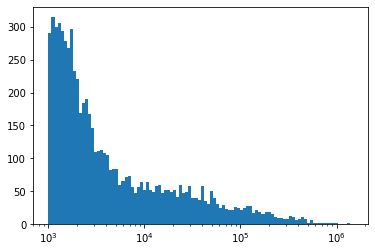

In [38]:
#plt.hist(features.length, bins=300)

def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')

plot_loghist(features.length, 100)